# Scanning CVEs for git-based commit URLs

In [1]:
from source.utility import *
from source.commit_urls import *

json_files = find_json_files(CVE_DIR)
patch_links = find_urls(json_files)
print(f'Number of URL links: {len(patch_links)}')

Connected to SQLite
Number of URL links: 91


In [2]:
from source.flatten_cve import *
from source.patchset import *   

df = flatten_cve(CVE_DIR)
collect_repos(df)

Number of URL links: 21
====================Merging JSON files====================
#JSON files to scan: 21
Number of DataFrames: 21
Duplicate columns: ['dateUpdated']
Saved flatten_CVE records to SQLite database
#records:  (21, 19)
Number of URL links: 21
====================Merging JSON files====================
#JSON files to scan: 21
Number of DataFrames: 21
Duplicate columns: ['dateUpdated']
Saved flatten_CVE records to SQLite database
#records:  (21, 19)
Columns with list type: 
['affected', 'descriptions', 'metrics', 'problemTypes', 'references', 'cwe']

Table: affected - (21, 4)
Table: descriptions - (21, 3)
Table: metrics - (21, 13)
Table: problemTypes - (23, 2)
Table: references - (48, 4)
Table: cwe - (23, 1)
Repositories saved to sqlite3 database
Repositories: (21, 4)


,url,vcs,repository,commit_hash
1,https://github.com/lobehub/lobe-chat/commit/21...,GitHub,https://github.com/lobehub/lobe-chat,2184167f09ab68e4efa051ee984ea0c4e7c48fbd
3,https://github.com/minio/minio/commit/0ae4915a...,GitHub,https://github.com/minio/minio,0ae4915a9391ef4b3ec80f5fcdcf24ee6884e776
6,https://github.com/WillyXJ/facileManager/commi...,GitHub,https://github.com/WillyXJ/facileManager,0aa850d4b518f10143a4c675142b15caa5872877
8,https://github.com/urql-graphql/urql/commit/4b...,GitHub,https://github.com/urql-graphql/urql,4b7011b70d5718728ff912d02a4dbdc7f703540d
10,https://github.com/pyload/pyload/commit/fe9445...,GitHub,https://github.com/pyload/pyload,fe94451dcc2be90b3889e2fd9d07b483c8a6dccd
12,https://github.com/mailcow/mailcow-dockerized/...,GitHub,https://github.com/mailcow/mailcow-dockerized,087481ac12bfa5dd715f3630f0b1697be94f7e88
14,https://github.com/crafatar/crafatar/commit/bb...,GitHub,https://github.com/crafatar/crafatar,bba004acc725b362a5d2d5dfe30cf60e7365a373
17,https://github.com/moby/moby/commit/3e230cfdcc...,GitHub,https://github.com/moby/moby,3e230cfdcc989dc524882f6579f9e0dac77400ae
19,https://github.com/discourse/discourse-group-m...,GitHub,https://github.com/discourse/discourse-group-m...,b394d61b0bdfd18a2d8310aa5cf26cccf8bd31c1
22,https://github.com/thorsten/phpMyFAQ/commit/54...,GitHub,https://github.com/thorsten/phpMyFAQ,5479b4a4603cce71aa7eb4437f1c201153a1f1f5


[4 2 2 2 1 1 1 1 1 1]


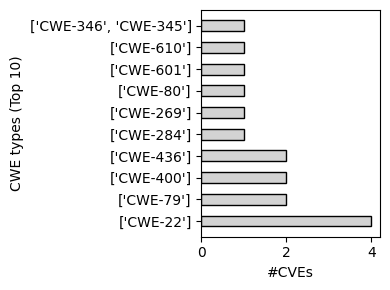

In [3]:
vals = df['cwe'].value_counts().head(10)
x = [str(x) for x in vals.index]
print(vals.values)

fig, ax = plt.subplots(figsize=(4, 3))
bar_width = 0.5
bars = ax.barh(x, width=vals.values,color='lightgray', edgecolor='black', height=bar_width)
ax.set_ylabel('CWE types (Top 10)')
ax.set_xlabel('#CVEs')
plt.tight_layout()
plt.savefig(f'figure/CWE-types.png')
plt.show()

In [ ]:
col_dfs = save_list_cols(df)
col_dfs.keys()

# Parsing git patch from commit $hash.diff$

In [ ]:
from source.patchset import *

patch = get_patch_from_url('https://github.com/ASSERT-KTH/RewardRepair/commit/2509b5e91e2e80b6b84da3d8cd0e1d1748c0ecfc')
# patch = get_patch_from_url('https://github.com/PackageKit/PackageKit/commit/64278c9127e3333342b56ead99556161f7e86f79')

In [ ]:
# # parse all the patches from the patch links
# def parse_all_patches(patch_links):
#     """Parse all the patches from the patch links
#     """
#     all_patches = {}
#     for json_file, commit_urls in patch_links.items():
#         print(f'Parsing patches for {json_file}')
#         for url in commit_urls:
#             try:
#                 patch = get_patch_from_url(url)
#                 patch_meta, patch_hunks = parse_patch_hunks(patch)
#                 all_patches[url] = (patch_meta, patch_hunks)
#             except Exception as e:
#                 print(f'Error parsing patch: {e}')
#     return all_patches

In [ ]:
import uuid 
  
id = uuid.uuid4().hex
id